# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

DATASET_PATH = '../data/water_potability.csv'
raw_df = pd.read_csv(DATASET_PATH)

Primeramente, consultamos metadata del dataframe. Vemos que tenemos un total de 3276 observaciones. Ademas, 3 columnas tienen datos nulos o NaN: `ph`, `Sulfate` y `Trihalomethanes`.

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Vemos los primeros estadísticos de las distribuciones de las variables: 

In [4]:
raw_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
raw_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Como podemos observar, casi todas nuestras columnas son numericas contínuas. Solo la variable `Potability` es categórica.

Definimos nuestras features y la variable target

In [6]:
# Asumptions
NUMERICAL_FEATURES = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes',  'Turbidity']
NUMERICAL_CONTINOUS = NUMERICAL_FEATURES
CATEGORY_FEATURES = ['Potability']

TARGET = "Potability"

Vemos los primeros graficos descriptivos de las distribuciones de las variables:

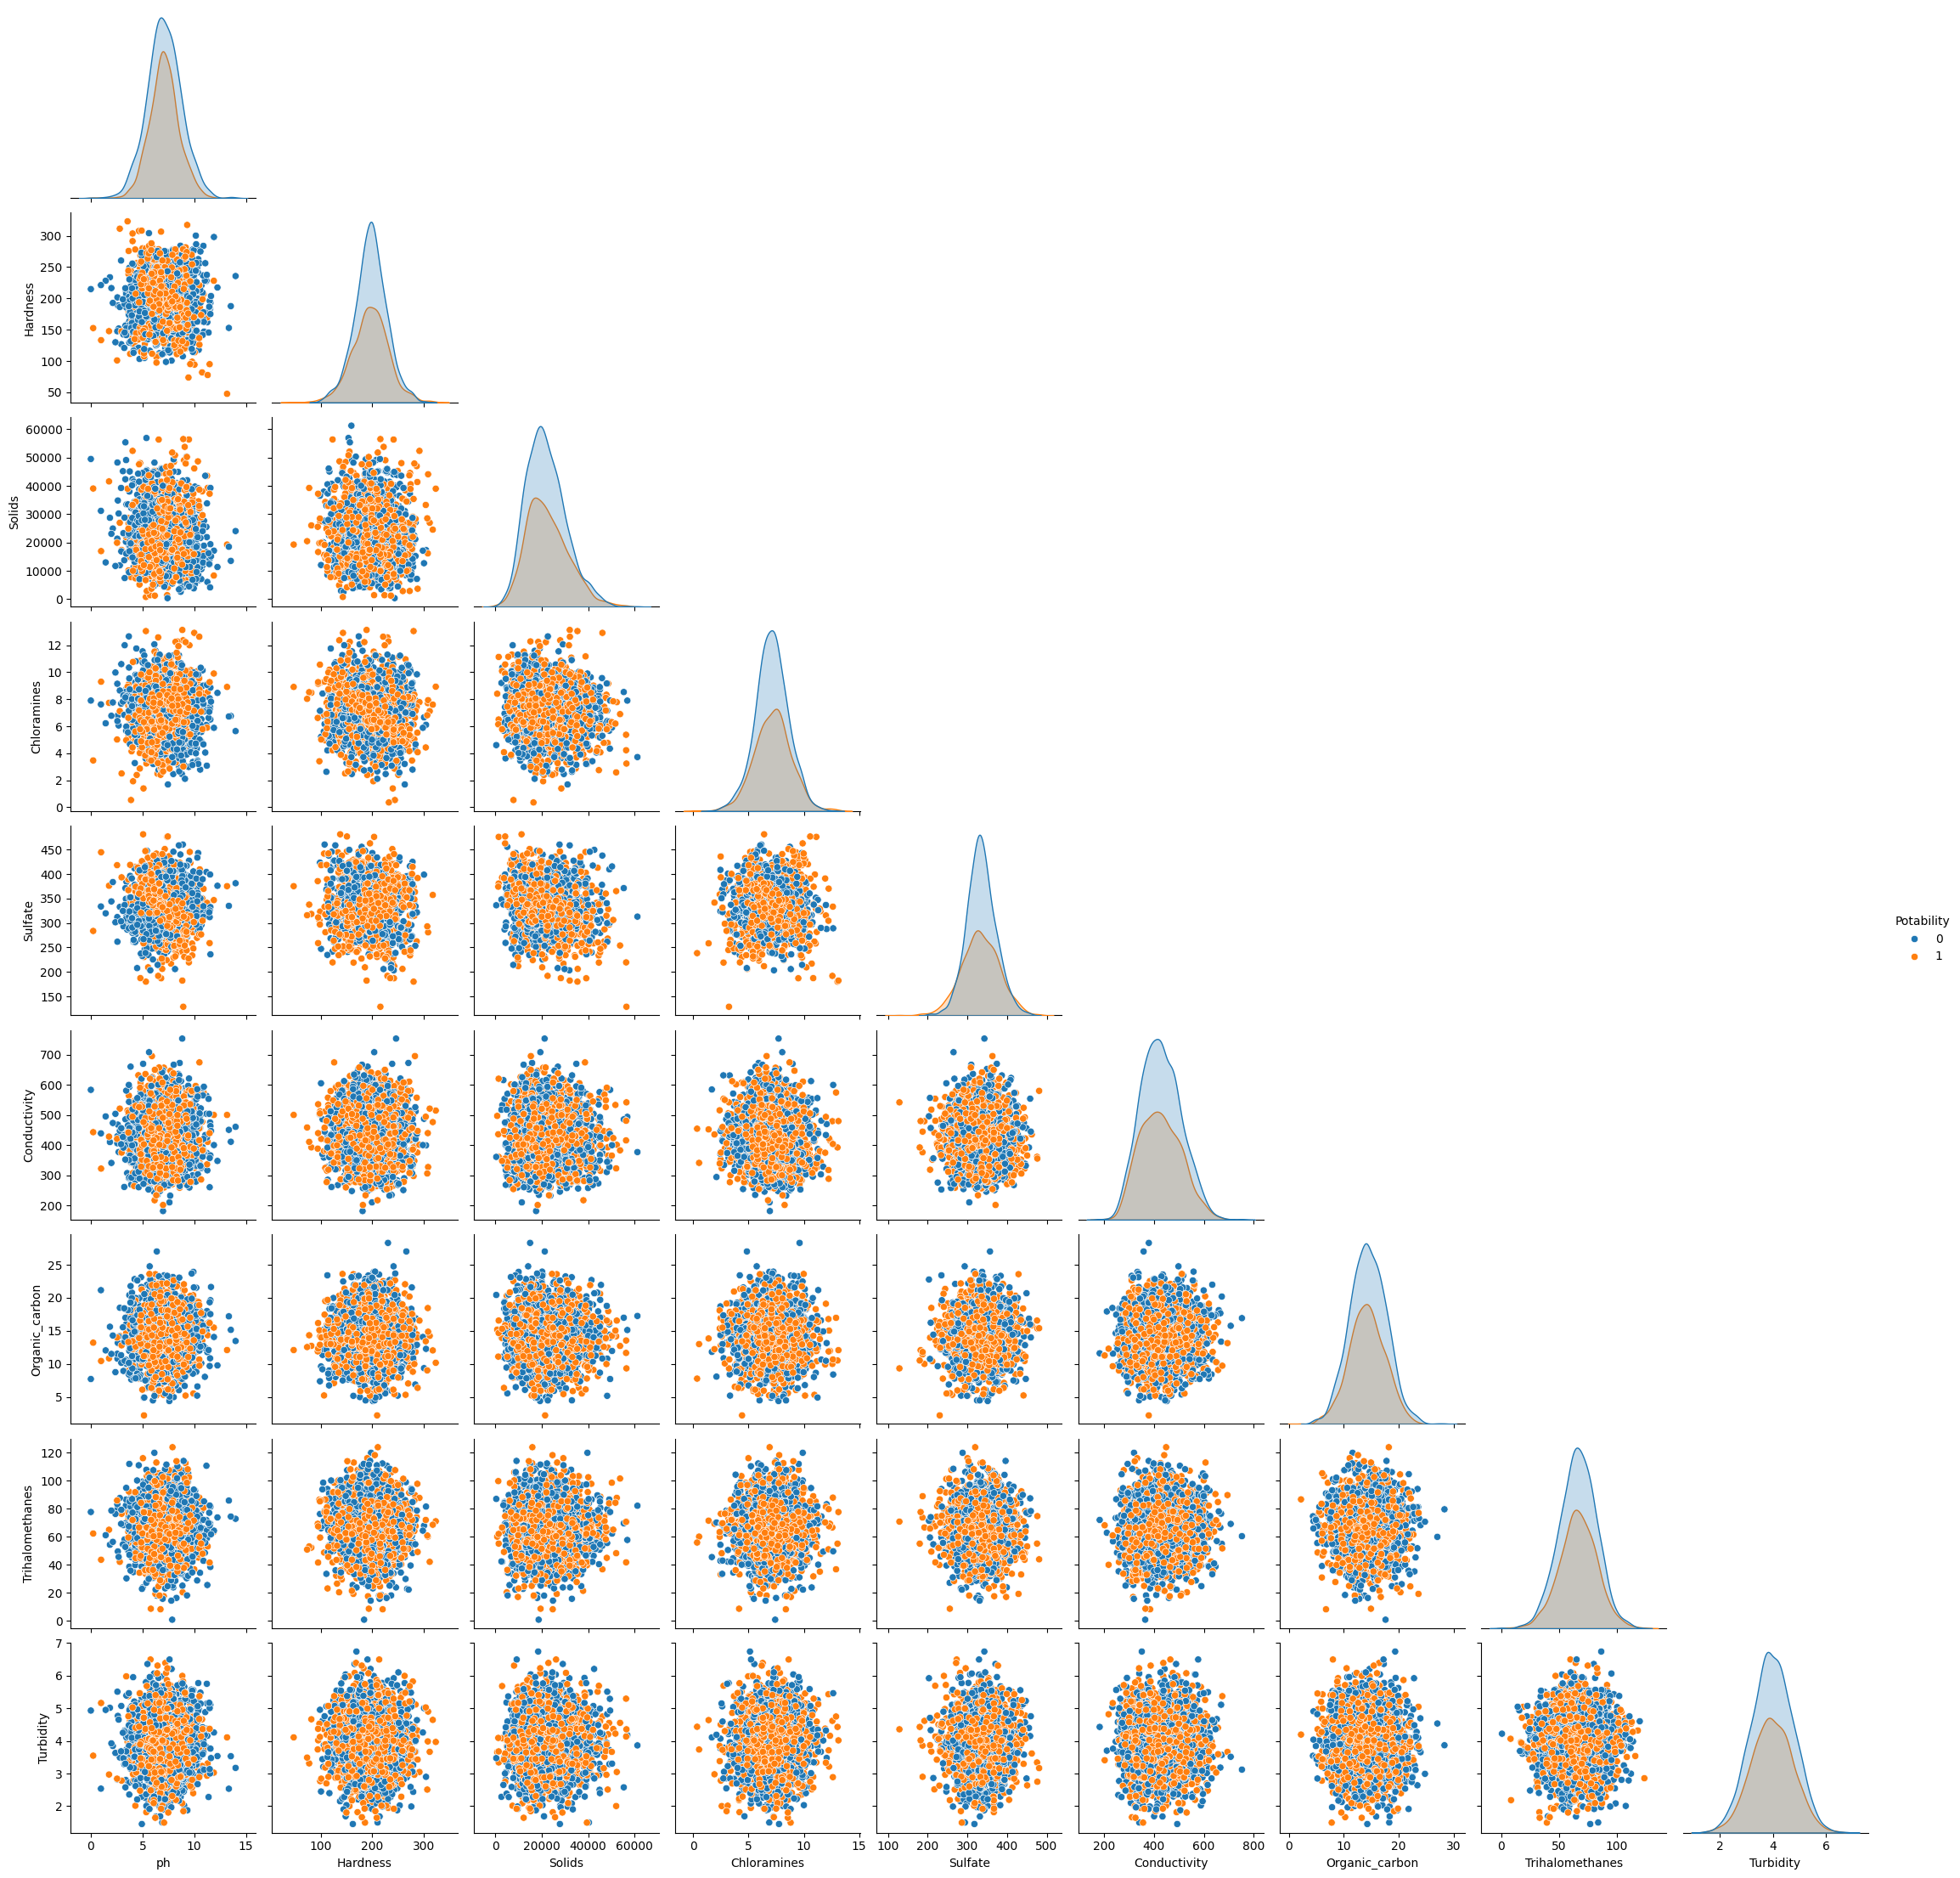

In [7]:
sns.pairplot(data=raw_df, corner=True, hue='Potability')

A primera vista, no vemos una relacion lineal entre variables. Continuamos analizando las variables realizando histogramas, qq-plots y box-plots para ver distribuciones y outliers: 

In [7]:
from utils import outlier_diagnostic_plots

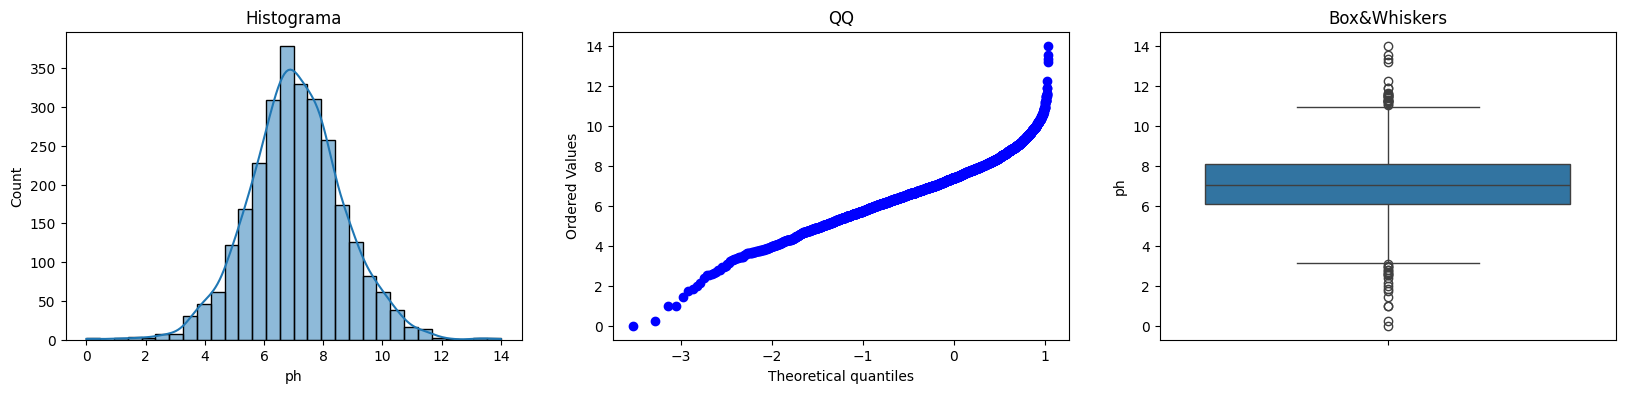

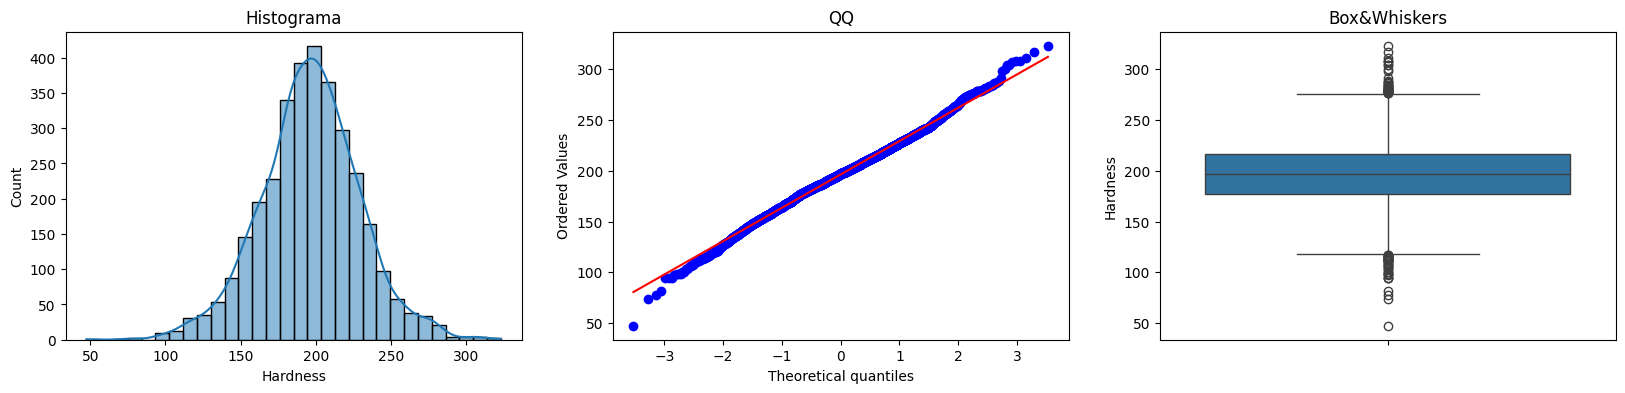

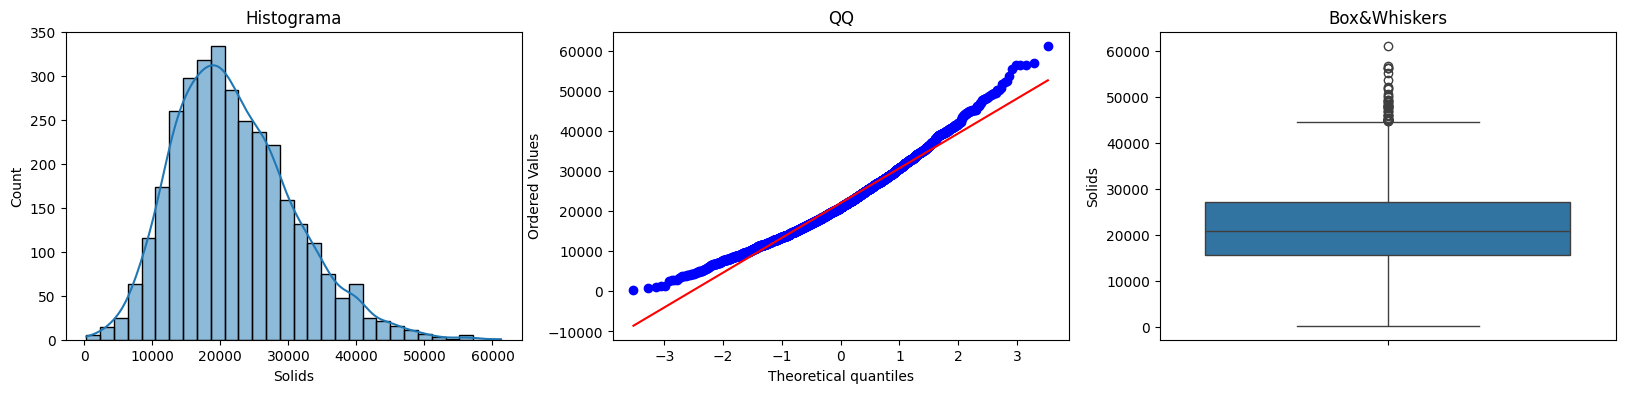

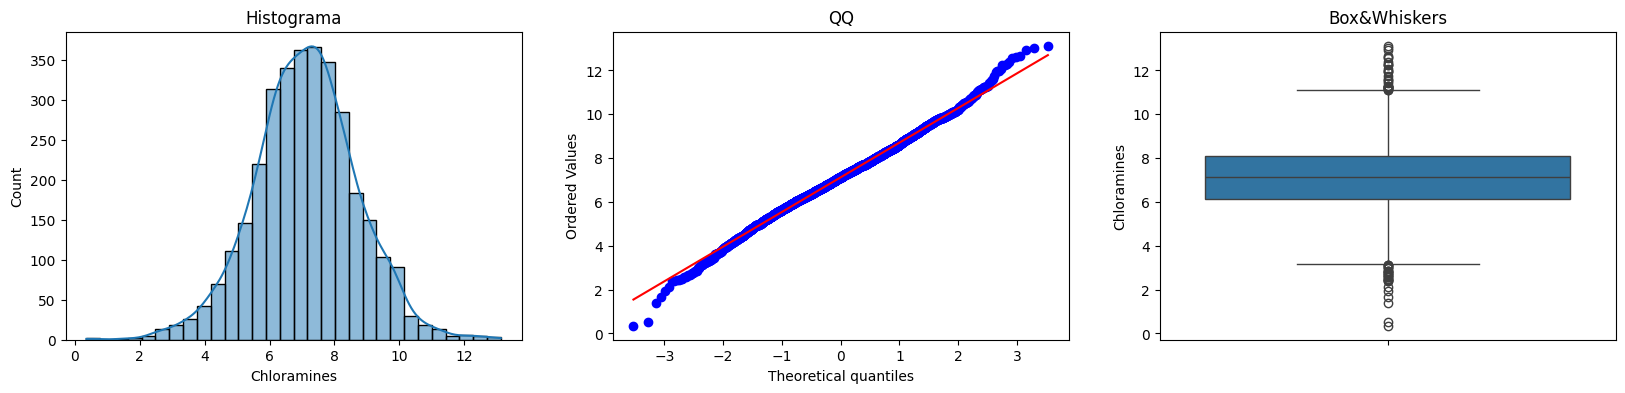

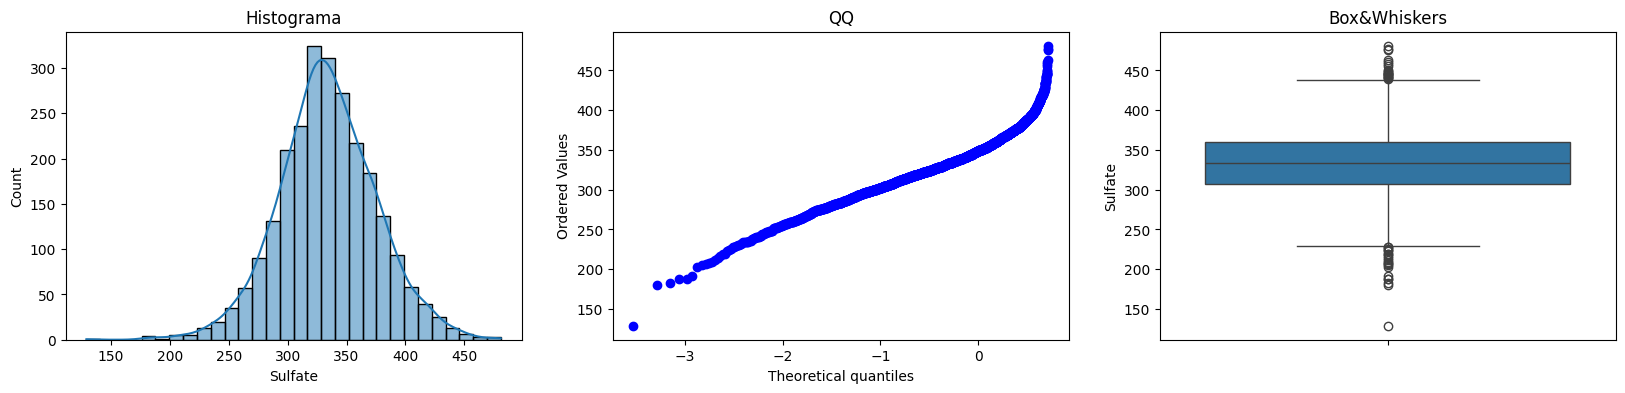

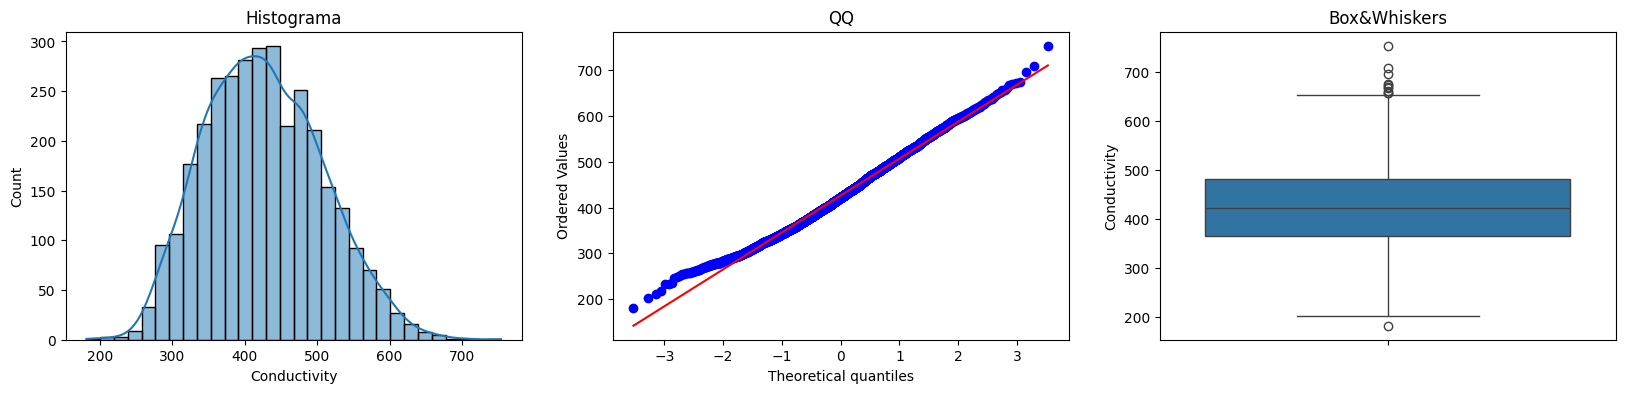

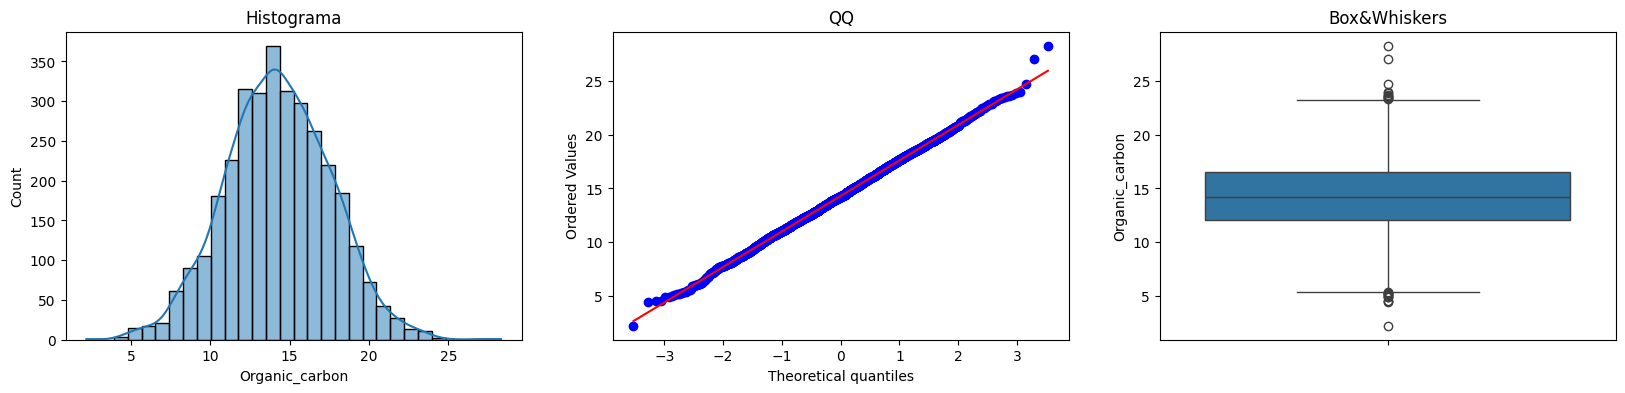

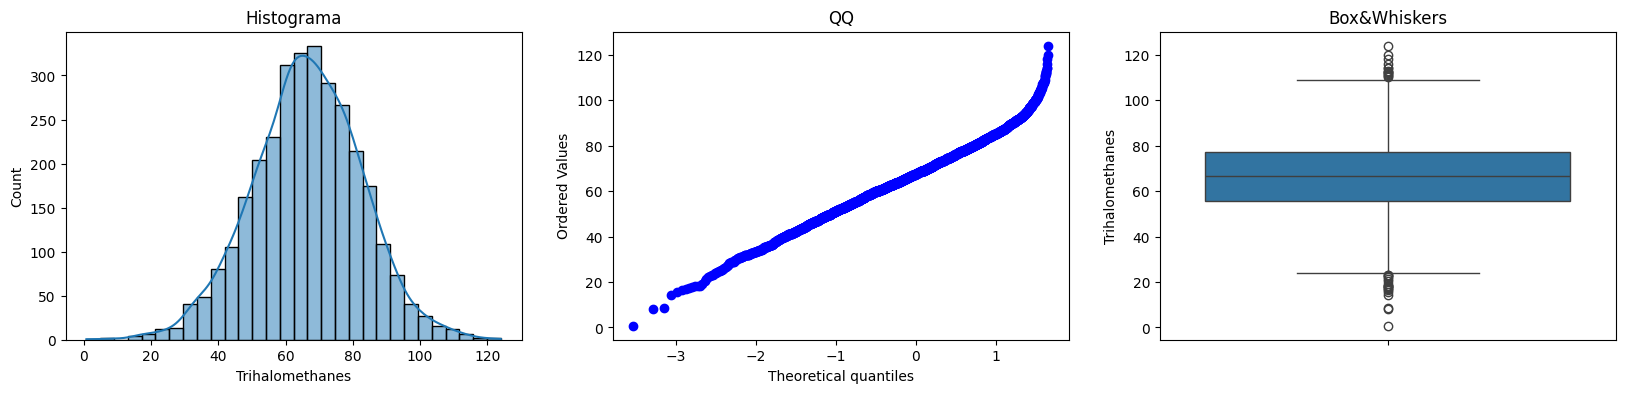

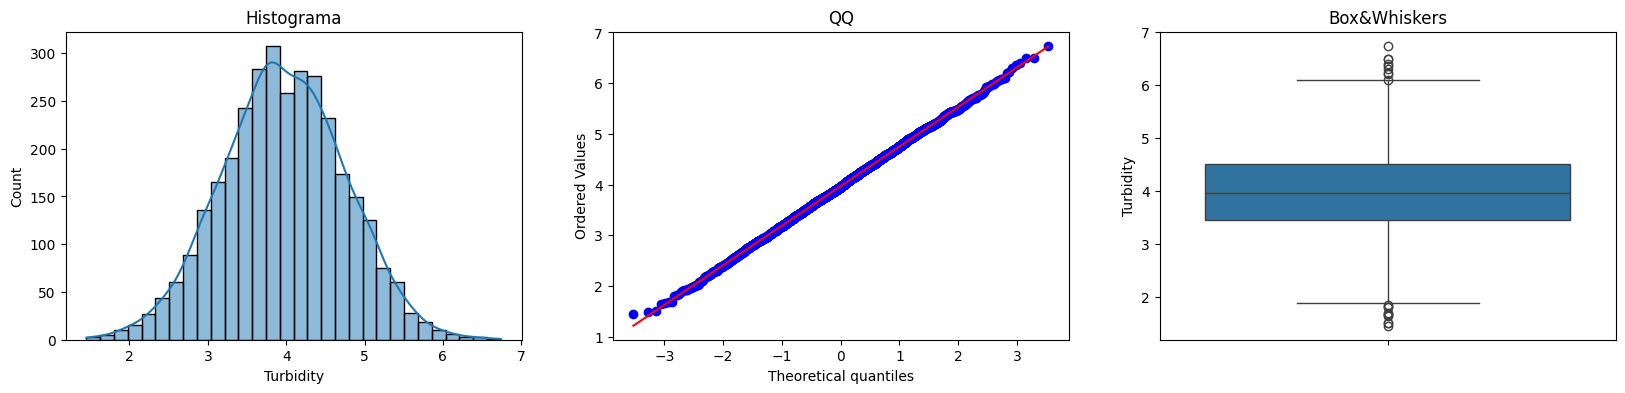

In [8]:
for column in raw_df[NUMERICAL_CONTINOUS].columns:
    outlier_diagnostic_plots(raw_df, column)

La mayoria de las distribuciones de las variables se asemejan a distribuciones normales. Vamos ademas presencia de outliers.

Graficamos las frecuencias de las clases de la variable `Potability` para ver si hay desbalance:

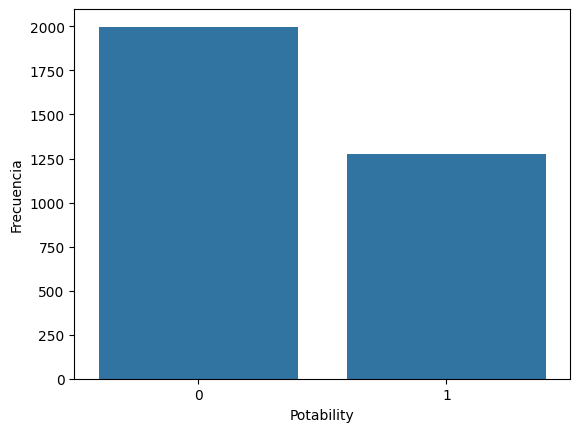

In [9]:
frecuencias_target = raw_df[TARGET].value_counts()

df_frecuencias = frecuencias_target.reset_index()
df_frecuencias.columns = ['Potability', 'Frecuencia']

sns.barplot(x='Potability', y='Frecuencia', data=df_frecuencias)
plt.show()

In [13]:
for index, frec in frecuencias_target.items():
    print(f"Potability {index}: {round((frec * 100) / len(raw_df), 1)}%")

Potability 0: 61.0%
Potability 1: 39.0%


Vemos que las clases no estan balanceadas en proporción, pero no es un desbalance grave.

Finalmente calculamos las matrices de correlacion de Pearson y Spearman:

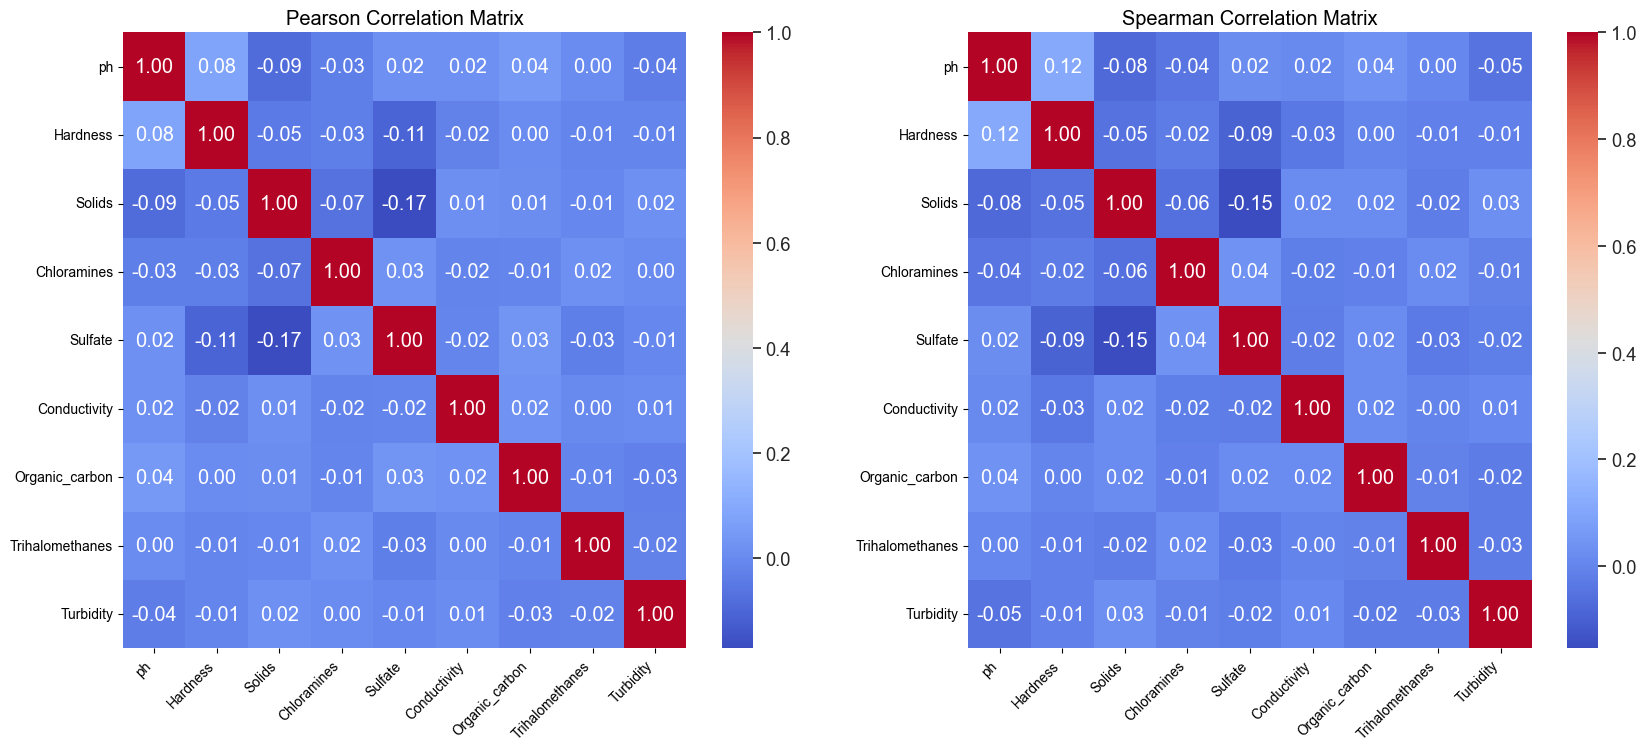

In [10]:
fig,ax = plt.subplots(1, 2,figsize=(20, 8))

# PEARSON CORRELATION MATRIX
pearson_corr_matrix = raw_df[NUMERICAL_FEATURES].corr(method='pearson')
sns.set(font_scale=1.2)
sns.heatmap(pearson_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, ax=ax[0])
ax[0].grid(False)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
ax[0].set_title("Pearson Correlation Matrix")

# SPEARMAN CORRELATION MATRIX
spearman_corr_matrix = raw_df[NUMERICAL_FEATURES].corr(method='spearman')
sns.set(font_scale=1.2)
sns.heatmap(spearman_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, ax=ax[1])
ax[1].grid(False)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
ax[1].set_title("Spearman Correlation Matrix")

plt.show()

No se observan correlaciones entre variables. Esto puede ser un problema en modelos lineales.